In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [5]:
df = pd.read_csv("/content/netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
df = df [df['type'] == 'TV Show' ]
df = df.dropna(subset = ['listed_in', 'duration', 'rating'])
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(int)
df['main_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip())

In [7]:
features = df[['main_genre', 'rating', 'duration_num']]

features_encoded = pd.get_dummies(features[['main_genre', 'rating']])
features_scaled = pd.concat([features_encoded, features['duration_num']], axis=1)

scaler = StandardScaler()
scaled = scaler.fit_transform(features_scaled)


In [8]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled)

In [9]:
df.groupby('Cluster')[['main_genre', 'rating', 'duration_num']].agg(lambda x: x.value_counts().index[0])


,main_genre,rating,duration_num
Cluster,,,
0,Kids' TV,TV-PG,1
1,British TV Shows,TV-MA,1
2,International TV Shows,TV-MA,1
3,Kids' TV,TV-Y7,1


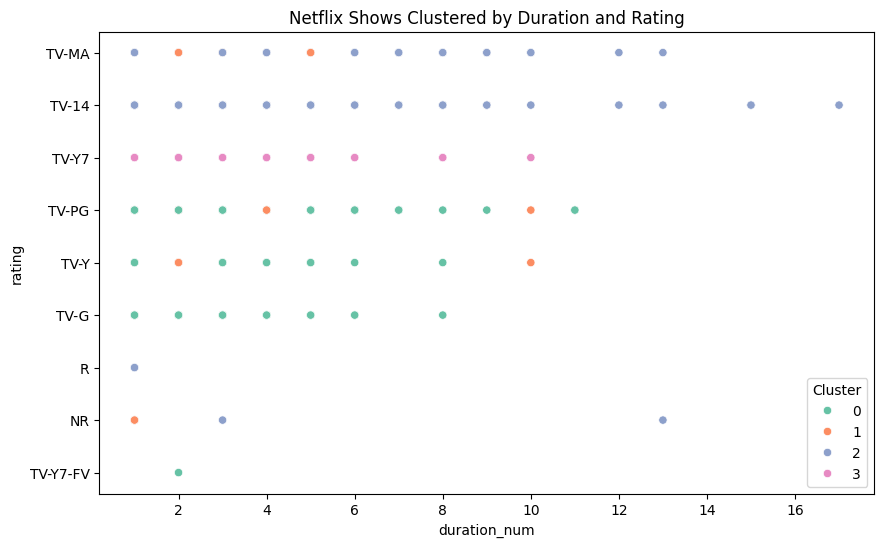

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_num', y='rating', hue='Cluster', data=df, palette='Set2')
plt.title("Netflix Shows Clustered by Duration and Rating")
plt.show()